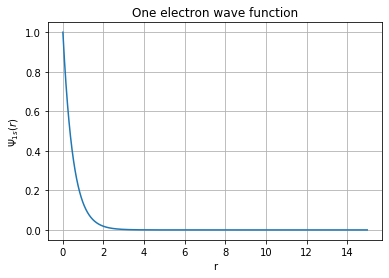

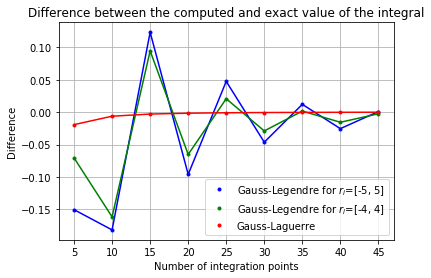

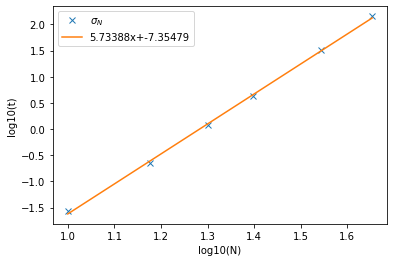

In [4]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

#Here we read the data for the one electron function
fname="Gauss_result/One_electron_function"
f=open(fname, "r")
line=f.readlines()
n=int(line[1])

x=np.zeros(n)
f=np.zeros(n)

#Here we save the data for the one electron function
x, f = np.loadtxt(fname,skiprows=3,unpack=True)
plt.figure()
#Here we plot the one electron function
plt.plot(x,f)
plt.grid(True)
plt.title(r"One electron wave function")
plt.ylabel(r"$\Psi_{1s}(r)$")
plt.xlabel(r"r")
plt.savefig("img/One_electron.pdf")

#Here we define the variables for the integrals errors plot
file_values = np.array([0,1,2,3,4,5,6,7,8])
#This variables are for the Gauss-Legendre integration for $r_i$=[-5, 5]
n_values = np.zeros(9)
integral = np.zeros(9)
#This is the expected result
result=0.19276571095877654

#This variables are for the Gauss-Legendre integration for $r_i$=[-4, 4]
n_values1 = np.zeros(9)
integral1 = np.zeros(9)

#This variables are for the Gauss-Laguerre
n_values2 = np.zeros(9)
integral2 = np.zeros(9) 

#Here we read the computed integrals values
for num_file in file_values:
    fname="Gauss_result/leg_%d" % num_file
    fname1="Gauss_result/leg%d" % num_file
    fname2="Gauss_result/lag_%d" % num_file
    infile=open(fname, "r")
    infile1=open(fname1, "r")
    infile2=open(fname2, "r")
    lines=infile.readlines()
    lines1=infile1.readlines()
    lines2=infile2.readlines()
    n_values[num_file]=int(lines[2])
    integral[num_file]=float(lines[6])
    integral1[num_file]=float(lines1[6])
    integral2[num_file]=float(lines2[4])

#Here we plot the graphs
plt.figure()
plt.plot(n_values,integral-result, "b")
plt.plot(n_values,integral1-result, "g")
plt.plot(n_values,integral2-result, "r")
plt.grid(True)
figure,=plt.plot(n_values,integral-result, "b.", label='Gauss-Legendre for $r_i$=[-5, 5]')
figure1,=plt.plot(n_values,integral1-result, "g.", label='Gauss-Legendre for $r_i$=[-4, 4]')
figure2,=plt.plot(n_values,integral2-result, "r.", label='Gauss-Laguerre')
plt.legend([figure, figure1, figure2], ['Gauss-Legendre for $r_i$=[-5, 5]', 'Gauss-Legendre for $r_i$=[-4, 4]', 'Gauss-Laguerre'], loc='lower right')
plt.title(r"Difference between the computed and exact value of the integral")
plt.ylabel(r"Difference")
plt.xlabel(r"Number of integration points")
plt.savefig("img/Comparation.pdf")
#End of the error plot

#Here we want to plot time required to run the different algorithms
#Those are the data for the Laguerre plolynomials
x = np.log10(np.array([10,15,20,25,35,45]))
y = np.log10(np.array([0.0269326,0.224246,1.20471,4.27829,32.0729,143.811]))

#Those are the data for the Legendre plolynomials
y1=np.log10(np.array([0.0269326,0.224246,1.20471,4.27829,32.0729,143.811]))

plt.figure()
plt.plot(x,y,"x",label=r"$\sigma_N$")
p = np.polyfit(x,y,1)
plt.plot(x,p[0]*x+p[1],label="%gx+%g"%(p[0],p[1]))
plt.xlabel("log10(N)")
plt.ylabel("log10(t)")
plt.legend()
plt.savefig("img/plot_time_Gauss.pdf")



